# BT4012 Project: Model Building, Tuning, and Evaluation
### Completed by: Group 8

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Initialize the evaluator
from model_evaluator import ModelEvaluator
evaluator = ModelEvaluator()

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Global Variables
RANDOM_STATE = 42

# Load Datasets & Basic EDA

#### Train set

In [2]:
train_df = pd.read_csv('../data/processed/train.csv')
train_df.head()

,category_grocery_pos,category_misc_net,category_shopping_net,trans_timeofday_afternoon,trans_timeofday_evening,trans_timeofday_morning,trans_timeofday_night,amt,dist_from_last_trans,merchant,time_since_last_trans,trans_hour,trans_isworkhours,is_fraud
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000011,0.214939,0.002540,0.004717,1.000000,0,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000508,0.579818,0.002287,0.016741,0.652174,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000631,0.534537,0.001380,0.026992,0.695652,1,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.005356,0.242022,0.001711,0.089617,0.434783,1,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.014015,0.671043,0.003447,0.004334,0.347826,1,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232668 entries, 0 to 232667
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   category_grocery_pos       232668 non-null  float64
 1   category_misc_net          232668 non-null  float64
 2   category_shopping_net      232668 non-null  float64
 3   trans_timeofday_afternoon  232668 non-null  float64
 4   trans_timeofday_evening    232668 non-null  float64
 5   trans_timeofday_morning    232668 non-null  float64
 6   trans_timeofday_night      232668 non-null  float64
 7   amt                        232668 non-null  float64
 8   dist_from_last_trans       232668 non-null  float64
 9   merchant                   232668 non-null  float64
 10  time_since_last_trans      232668 non-null  float64
 11  trans_hour                 232668 non-null  float64
 12  trans_isworkhours          232668 non-null  int64  
 13  is_fraud                   23

#### Validation set

In [4]:
validation_df = pd.read_csv('../data/processed/validation.csv')
validation_df.head()

,category_grocery_pos,category_misc_net,category_shopping_net,trans_timeofday_afternoon,trans_timeofday_evening,trans_timeofday_morning,trans_timeofday_night,amt,dist_from_last_trans,merchant,time_since_last_trans,trans_hour,trans_isworkhours,is_fraud
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.018751,0.360518,0.000808,0.204182,0.608696,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000370,0.587510,0.000830,0.043286,0.913043,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000746,0.427590,0.001023,0.024188,1.000000,0,0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000356,0.442112,0.003180,0.369554,0.608696,1,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000128,0.487675,0.001092,0.026658,0.565217,1,0


In [5]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   category_grocery_pos       30000 non-null  float64
 1   category_misc_net          30000 non-null  float64
 2   category_shopping_net      30000 non-null  float64
 3   trans_timeofday_afternoon  30000 non-null  float64
 4   trans_timeofday_evening    30000 non-null  float64
 5   trans_timeofday_morning    30000 non-null  float64
 6   trans_timeofday_night      30000 non-null  float64
 7   amt                        30000 non-null  float64
 8   dist_from_last_trans       30000 non-null  float64
 9   merchant                   30000 non-null  float64
 10  time_since_last_trans      30000 non-null  float64
 11  trans_hour                 30000 non-null  float64
 12  trans_isworkhours          30000 non-null  int64  
 13  is_fraud                   30000 non-null  int

#### Test set

In [6]:
test_df = pd.read_csv('../data/processed/test.csv')
test_df.head()

,category_grocery_pos,category_misc_net,category_shopping_net,trans_timeofday_afternoon,trans_timeofday_evening,trans_timeofday_morning,trans_timeofday_night,amt,dist_from_last_trans,merchant,time_since_last_trans,trans_hour,trans_isworkhours,is_fraud
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.002465,0.216631,0.000765,0.057390,0.521739,1,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.013654,0.308795,0.002794,0.105005,0.217391,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.003374,0.225573,0.000408,0.028884,0.217391,0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.005874,0.401045,0.000830,0.091167,0.782609,1,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.002706,0.624411,0.001057,0.045945,0.565217,1,0


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   category_grocery_pos       30000 non-null  float64
 1   category_misc_net          30000 non-null  float64
 2   category_shopping_net      30000 non-null  float64
 3   trans_timeofday_afternoon  30000 non-null  float64
 4   trans_timeofday_evening    30000 non-null  float64
 5   trans_timeofday_morning    30000 non-null  float64
 6   trans_timeofday_night      30000 non-null  float64
 7   amt                        30000 non-null  float64
 8   dist_from_last_trans       30000 non-null  float64
 9   merchant                   30000 non-null  float64
 10  time_since_last_trans      30000 non-null  float64
 11  trans_hour                 30000 non-null  float64
 12  trans_isworkhours          30000 non-null  int64  
 13  is_fraud                   30000 non-null  int

#### Splitting into X and y

In [8]:
# split train df, validation df, test df into each of their X and y
y_train = train_df.pop('is_fraud')
X_train = train_df

y_valid = validation_df.pop('is_fraud')
X_valid = validation_df

y_test = test_df.pop('is_fraud')
X_test = test_df

In [9]:
X_train

,category_grocery_pos,category_misc_net,category_shopping_net,trans_timeofday_afternoon,trans_timeofday_evening,trans_timeofday_morning,trans_timeofday_night,amt,dist_from_last_trans,merchant,time_since_last_trans,trans_hour,trans_isworkhours
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000011,0.214939,0.002540,0.004717,1.000000,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000508,0.579818,0.002287,0.016741,0.652174,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000631,0.534537,0.001380,0.026992,0.695652,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.005356,0.242022,0.001711,0.089617,0.434783,1
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.014015,0.671043,0.003447,0.004334,0.347826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000378,0.000000,0.000636,0.000000,0.130435,0
232664,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.056439,0.000000,0.001517,0.000000,0.130435,0
232665,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.018976,0.000000,0.004169,0.000000,0.782609,1
232666,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.075326,0.000000,0.003099,0.000000,1.000000,0


# Model Building & Hyperparameter Tuning

### Steps
- Choose a model: LogisticRegression, RidgeClassifier, SGDClassifier, KNeighborsClassifier, SVC, GaussianNB, DecisionTreeClassifier, HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, XGBClassifier
- Fit the model to the train set
- Get model's predictions for the train and validation set
- Use RandomizedSearchCV for K-fold Cross-Validation and Hyperparameter Tuning such that model performance can be optimised while preventing overfitting
- Repeat the steps above for other models

#### Baseline Model (DummyClassifier with 'prior' strategy)
DummyClassifier that will always predict the most frequent class label

In [10]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="prior", random_state=RANDOM_STATE)
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=42)

In [11]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_dummy = dummy_clf.predict(X_valid)
y_valpred_prob_dummy = dummy_clf.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="Baseline Model",
    y_actual=y_valid,
    y_pred=y_valpred_dummy,
    y_pred_prob=y_valpred_prob_dummy,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
Baseline Model,0.9942,0.0,0.0,0.0,0.5,0.0058


#### Logistic Regression

In [12]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, randint

# create hyperparameter grid
logreg_param_l1l2 = {
    'C': uniform(0.001, 10.0),
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'max_iter': [1000],
    'class_weight': ['balanced', None]
}

logreg_param_elasticnet = {
    'C': uniform(0.001, 10.0),
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'l1_ratio': uniform(0, 1),
    'max_iter': [1000],
    'class_weight': ['balanced', None]
}

logreg_param_distributions = [logreg_param_l1l2, logreg_param_elasticnet]

# create model
logreg_model = LogisticRegression(random_state=RANDOM_STATE)

# initialise randomised search with model, hyperparameter grid, and stratified 5-fold cross-validation
logreg_random_search = RandomizedSearchCV(
    logreg_model, 
    param_distributions=logreg_param_distributions,
    n_iter=50, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE), 
    scoring='roc_auc',
    random_state=RANDOM_STATE, 
    n_jobs=-1
)

# perform randomised search on the train set
logreg_random_search.fit(X_train, y_train)

# get the best parameters and best model
print("Best Parameters:", logreg_random_search.best_params_)
logreg_model = logreg_random_search.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Best Parameters: {'C': 7.9664298686023285, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [13]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_logreg = logreg_model.predict(X_valid)
y_valpred_prob_logreg = logreg_model.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="LogisticRegression",
    y_actual=y_valid,
    y_pred=y_valpred_logreg,
    y_pred_prob=y_valpred_prob_logreg,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
LogisticRegression,0.959267,0.041958,0.275862,0.072838,0.637307,0.087633


#### SGDClassifier

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint

# create hyperparameter grid
sgd_param_distributions = {
    'loss': ['log_loss', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': uniform(1e-5, 1),
    'l1_ratio': uniform(0, 1),
    'max_iter': [1000],
    'learning_rate': ['optimal', 'adaptive'],
    'class_weight': ['balanced', None]
}

# create model
sgd_model = SGDClassifier(random_state=RANDOM_STATE)

# initialise randomised search with model, hyperparameter grid, and stratified 5-fold cross-validation
sgd_random_search = RandomizedSearchCV(
    sgd_model, 
    param_distributions=sgd_param_distributions,
    n_iter=50, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE), 
    scoring='roc_auc',
    random_state=RANDOM_STATE, 
    n_jobs=-1
)

# perform randomised search on the train set
sgd_random_search.fit(X_train, y_train)

# get the best parameters and best model
print("Best Parameters:", sgd_random_search.best_params_)
sgd_model = sgd_random_search.best_estimator_

Best Parameters: {'alpha': 0.031439185686734254, 'class_weight': 'balanced', 'l1_ratio': 0.47537022318211175, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l2'}


In [15]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_sgd = sgd_model.predict(X_valid)
y_valpred_prob_sgd = sgd_model.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="SGDClassifier",
    y_actual=y_valid,
    y_pred=y_valpred_sgd,
    y_pred_prob=y_valpred_prob_sgd,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
SGDClassifier,0.897033,0.02447,0.431034,0.046311,0.765122,0.081106


#### RidgeClassifier

In [16]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint

# create hyperparameter grid
ridge_param_distributions = {
    'alpha': uniform(0.1, 10.0),
    'class_weight': ['balanced', None]
}

# create model
ridge_model = RidgeClassifier(random_state=RANDOM_STATE)

# initialise randomised search with model, hyperparameter grid, and stratified 5-fold cross-validation
ridge_random_search = RandomizedSearchCV(
    ridge_model, 
    param_distributions=ridge_param_distributions,
    n_iter=50, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE), 
    scoring='roc_auc',
    random_state=RANDOM_STATE, 
    n_jobs=-1
)

# perform randomised search on the train set
ridge_random_search.fit(X_train, y_train)

# get the best parameters and best model
print("Best Parameters:", ridge_random_search.best_params_)
ridge_model = ridge_random_search.best_estimator_

Best Parameters: {'alpha': 0.10778765841014329, 'class_weight': None}


In [17]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_ridge = ridge_model.predict(X_valid)
y_valpred_dec_ridge = ridge_model.decision_function(X_valid)

evaluator.evaluate_model(
    model_name="RidgeClassifier",
    y_actual=y_valid,
    y_pred=y_valpred_ridge,
    y_pred_prob=None,
    y_pred_dec=y_valpred_dec_ridge,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
RidgeClassifier,0.9543,0.053025,0.408046,0.093853,0.761089,0.093102


#### KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint

# create hyperparameter grid
kneigh_param_distributions = {
    'n_neighbors': randint(2, 5),
    'weights': ['uniform', 'distance'],
    'p': randint(1, 3)
}

# create model
kneigh_model = KNeighborsClassifier()

# initialise randomised search with model, hyperparameter grid, and stratified 5-fold cross-validation
kneigh_random_search = RandomizedSearchCV(
    kneigh_model, 
    param_distributions=kneigh_param_distributions,
    n_iter=50, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE), 
    scoring='roc_auc',
    random_state=RANDOM_STATE, 
    n_jobs=-1
)

# perform randomised search on the train set
kneigh_random_search.fit(X_train, y_train)

# get the best parameters and best model
print("Best Parameters:", kneigh_random_search.best_params_)
kneigh_model = kneigh_random_search.best_estimator_

Best Parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [19]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_kneigh = kneigh_model.predict(X_valid)
y_valpred_prob_kneigh = kneigh_model.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="KNeighborsClassifier",
    y_actual=y_valid,
    y_pred=y_valpred_kneigh,
    y_pred_prob=y_valpred_prob_kneigh,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
KNeighborsClassifier,0.982633,0.142268,0.396552,0.209408,0.785382,0.098543


#### GaussianNB

In [20]:
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# create hyperparameter grid
param_dist = {
    'var_smoothing': uniform(1e-9, 1e-1) 
}

# create model
gnb_model = GaussianNB()

# initialise randomised search with model, hyperparameter grid, and stratified 5-fold cross-validation
gnb_random_search = RandomizedSearchCV(
    gnb_model,
    param_distributions=param_dist,
    n_iter=50, 
    scoring='roc_auc', 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
    random_state=RANDOM_STATE,
    verbose=2,
    n_jobs=-1 
)

# perform randomised search on the train set
gnb_random_search.fit(X_train, y_train)

# get the best parameters and best model
print("Best Parameters:", gnb_random_search.best_params_)
gnb_model = gnb_random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..................var_smoothing=0.03745401288473625; total time=   0.1s
[CV] END ..................var_smoothing=0.03745401288473625; total time=   0.1s
[CV] END ..................var_smoothing=0.03745401288473625; total time=   0.1s
[CV] END ..................var_smoothing=0.03745401288473625; total time=   0.1s
[CV] END ..................var_smoothing=0.09507143164099162; total time=   0.1s
[CV] END ..................var_smoothing=0.03745401288473625; total time=   0.2s
[CV] END ..................var_smoothing=0.09507143164099162; total time=   0.1s
[CV] END ..................var_smoothing=0.09507143164099162; total time=   0.2s
[CV] END ..................var_smoothing=0.09507143164099162; total time=   0.2s
[CV] END ..................var_smoothing=0.09507143164099162; total time=   0.1s
[CV] END ...................var_smoothing=0.0731993951811405; total time=   0.1s
[CV] END ...................var_smoothing=0.073

In [21]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_gnb = gnb_model.predict(X_valid)
y_valpred_prob_gnb = gnb_model.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="GaussianNB",
    y_actual=y_valid,
    y_pred=y_valpred_gnb,
    y_pred_prob=y_valpred_prob_gnb,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
GaussianNB,0.9312,0.030785,0.356322,0.056673,0.669862,0.068872


#### DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# create hyperparameter grid
param_dist = {
    'max_depth': randint(3, 10), 
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 20)
}

# create model
decisiontree_model = DecisionTreeClassifier(random_state=RANDOM_STATE)

# initialise randomised search with model, hyperparameter grid, and stratified 5-fold cross-validation
decisiontree_random_search = RandomizedSearchCV(
    decisiontree_model,
    param_distributions=param_dist,
    n_iter=50, 
    scoring='roc_auc', 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),  
    random_state=RANDOM_STATE,
    verbose=2, 
    n_jobs=-1 
)

# perform randomised search on the train set
decisiontree_random_search.fit(X_train, y_train)

# get the best parameters and best model
print("Best Parameters:", decisiontree_random_search.best_params_)
decisiontree_model = decisiontree_random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=12; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=12; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=12; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=12; total time=   0.5s
[CV] END max_depth=9, min_samples_leaf=15, min_samples_split=12; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=15, min_samples_split=12; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=15, min_samples_split=12; total time=   0.6s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=12; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=15, min_samples_split=12; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=15, min_samples_split=12; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=9; total time=   0.4s
[CV] END max_depth=5,

In [23]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_dt = decisiontree_model.predict(X_valid)
y_valpred_prob_dt = decisiontree_model.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="DecisionTree",
    y_actual=y_valid,
    y_pred=y_valpred_dt,
    y_pred_prob=y_valpred_prob_dt,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
DecisionTree,0.981,0.179612,0.637931,0.280303,0.957185,0.352188


#### HistGradientBoostingClassifier

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier

# create hyperparameter grid
histgb_param_grid = {
    "learning_rate": (0.01, 0.1, 0.2),
    "max_iter": (100, 200, 300),
    "max_depth": [3, 5, 7]
}

# create model
histgb_model = HistGradientBoostingClassifier(random_state=RANDOM_STATE)

# initialise randomised search with model, hyperparameter grid, and stratified 5-fold cross-validation
histgb_random_search = RandomizedSearchCV(
    histgb_model,
    param_distributions=histgb_param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
    random_state=RANDOM_STATE,
    verbose=2,
    n_jobs=-1
)

# perform randomised search on the train set
histgb_random_search.fit(X_train, y_train)

# get the best parameters and best model
print("Best Parameters:", histgb_random_search.best_params_)
histgb_model = histgb_random_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   2.5s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   2.6s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   2.6s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   2.6s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   2.6s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   4.8s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   4.8s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   4.8s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   4.9s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   4.9s
[CV] END ......learning_rate=0.01, max_depth=5, max_iter=100; total time=   2.4s
[CV] END ......learning_rate=0.01, max_depth=5,

In [25]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_histgb = histgb_model.predict(X_valid)
y_valpred_prob_histgb = histgb_model.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="HistGB",
    y_actual=y_valid,
    y_pred=y_valpred_histgb,
    y_pred_prob=y_valpred_prob_histgb,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
HistGB,0.9901,0.337731,0.735632,0.462929,0.985853,0.488852


#### RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

# create hyperparameter grid
rf_param_grid = {
    "n_estimators": (100, 300),
    "max_depth": [3, 5, 10],
    "min_samples_leaf": (2, 6, 10)
}

# create model
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)

# initialise randomised search with model, hyperparameter grid, and stratified 5-fold cross-validation
rf_random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,          
    scoring="roc_auc",  
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),               
    random_state=RANDOM_STATE,
    verbose=2,
    n_jobs=-1           
)

# perform randomised search on the train set
rf_random_search.fit(X_train, y_train)

# get the best parameters and best model
print("Best Parameters:", rf_random_search.best_params_)
rf_model = rf_random_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..max_depth=3, min_samples_leaf=2, n_estimators=100; total time=   4.7s
[CV] END ..max_depth=3, min_samples_leaf=2, n_estimators=100; total time=   4.8s
[CV] END ..max_depth=3, min_samples_leaf=2, n_estimators=100; total time=   4.8s
[CV] END ..max_depth=3, min_samples_leaf=2, n_estimators=100; total time=   4.8s
[CV] END ..max_depth=3, min_samples_leaf=2, n_estimators=100; total time=   4.9s
[CV] END ..max_depth=3, min_samples_leaf=6, n_estimators=100; total time=   4.8s
[CV] END ..max_depth=3, min_samples_leaf=6, n_estimators=100; total time=   5.0s
[CV] END ..max_depth=3, min_samples_leaf=6, n_estimators=100; total time=   4.8s
[CV] END ..max_depth=3, min_samples_leaf=6, n_estimators=100; total time=   4.9s
[CV] END ..max_depth=3, min_samples_leaf=6, n_estimators=100; total time=   4.9s
[CV] END ..max_depth=3, min_samples_leaf=2, n_estimators=300; total time=  14.5s
[CV] END ..max_depth=3, min_samples_leaf=2, n_es

In [27]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_rf = rf_model.predict(X_valid)
y_valpred_prob_rf = rf_model.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="RandomForest",
    y_actual=y_valid,
    y_pred=y_valpred_rf,
    y_pred_prob=y_valpred_prob_rf,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
RandomForest,0.977133,0.152174,0.643678,0.246154,0.965955,0.27432


#### XGBoost

In [28]:
import xgboost as xgb

# create hyperparameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# create model
xgb_model = xgb.XGBClassifier(random_state=RANDOM_STATE)

# initialise randomised search with model, hyperparameter grid, and stratified 5-fold cross-validation
xgb_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# perform randomised search on the train set
xgb_search.fit(X_train, y_train)

# get the best parameters and best model
print("Best Parameters:", xgb_search.best_params_)
xgb_model = xgb_search.best_estimator_

Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [29]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_xgb = xgb_model.predict(X_valid)
y_valpred_prob_xgb = xgb_model.predict_proba(X_valid)[:, 1]
evaluator.evaluate_model(
    model_name="XGBoost",
    y_actual=y_valid,
    y_pred=y_valpred_xgb,
    y_pred_prob=y_valpred_prob_xgb,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
XGBoost,0.990033,0.333333,0.718391,0.455373,0.988325,0.491684


#### AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

# create hyperparameter grid
adaboost_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# create model
adaboost_hyper_model = AdaBoostClassifier(random_state=RANDOM_STATE)

# initialise randomised search with model, hyperparameter grid, and stratified 5-fold cross-validation
adaboost_search = RandomizedSearchCV(
    adaboost_hyper_model,
    param_distributions=adaboost_param_grid,
    n_iter=10,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# perform randomised search on the train set
adaboost_search.fit(X_train, y_train)

# get the best parameters and best model
print("Best Parameters:", adaboost_search.best_params_)
adaboost_model = adaboost_search.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

Best Parameters: {'n_estimators': 150, 'learning_rate': 1.0}


In [31]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_adaboost = adaboost_model.predict(X_valid)
y_valpred_prob_adaboost = adaboost_model.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="AdaBoost",
    y_actual=y_valid,
    y_pred=y_valpred_adaboost,
    y_pred_prob=y_valpred_prob_adaboost,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
AdaBoost,0.9794,0.150943,0.551724,0.237037,0.969719,0.268708


#### VotingClassifier

In [32]:
from sklearn.ensemble import VotingClassifier

# define base models
voting_estimators = [
    ('histgb', histgb_model),
    ('xgb', xgb_model),
    ('adaboost', adaboost_model)
]

# create soft-voting model with base models
voting_model = VotingClassifier(
    estimators=voting_estimators,
    voting='soft'
)

# fit model to the train set
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('histgb',
                              HistGradientBoostingClassifier(max_depth=5,
                                                             max_iter=300,
                                                             random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=...
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('adaboost',
                              AdaBoostClassifier(n_estimators=150,
                                                 random_state=42))],
                 voting='soft')

In [33]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_voting = voting_model.predict(X_valid)
y_valpred_prob_voting = voting_model.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="Voting",
    y_actual=y_valid,
    y_pred=y_valpred_voting,
    y_pred_prob=y_valpred_prob_voting,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
Voting,0.990133,0.338624,0.735632,0.463768,0.986818,0.462922


#### StackingClassifier

In [34]:
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# define base models
stacking_estimators = [
    ('histgb', histgb_model),
    ('xgb', xgb_model),
    ('adaboost', adaboost_model)
]

# define meta-model (classifier to combine base models' predictions)
meta_model = LogisticRegression()

# create stacking model with base models and meta-model
stacking_model = StackingClassifier(
    estimators=stacking_estimators, 
    final_estimator=meta_model
)

# fit model to the train set
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('histgb',
                                HistGradientBoostingClassifier(max_depth=5,
                                                               max_iter=300,
                                                               random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamm...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=7,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('adaboost',
                                AdaBoostClassifier(n_estimators=150,
                                                   random_state=42))],
                   final_estimator=LogisticRegression())

In [35]:
# evaluate model performance on the validation set for hyperparameter tuning
y_valpred_stacking = stacking_model.predict(X_valid)
y_valpred_prob_stacking = stacking_model.predict_proba(X_valid)[:, 1]

evaluator.evaluate_model(
    model_name="Stacking",
    y_actual=y_valid,
    y_pred=y_valpred_stacking,
    y_pred_prob=y_valpred_prob_stacking,
    dataset_name="Validation"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
Stacking,0.989067,0.315789,0.758621,0.445946,0.890375,0.454468


#### Consolidated Model Performance on Validation Set

In [36]:
evaluator.display_results(dataset_name="Validation")

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
0,Baseline Model,0.994200,0.000000,0.000000,0.000000,0.500000,0.005800
1,LogisticRegression,0.959267,0.041958,0.275862,0.072838,0.637307,0.087633
2,SGDClassifier,0.897033,0.024470,0.431034,0.046311,0.765122,0.081106
3,RidgeClassifier,0.954300,0.053025,0.408046,0.093853,0.761089,0.093102
4,KNeighborsClassifier,0.982633,0.142268,0.396552,0.209408,0.785382,0.098543
5,GaussianNB,0.931200,0.030785,0.356322,0.056673,0.669862,0.068872
6,DecisionTree,0.981000,0.179612,0.637931,0.280303,0.957185,0.352188
7,HistGB,0.990100,0.337731,0.735632,0.462929,0.985853,0.488852
8,RandomForest,0.977133,0.152174,0.643678,0.246154,0.965955,0.274320
9,XGBoost,0.990033,0.333333,0.718391,0.455373,0.988325,0.491684


# Model Evaluation

### Steps
- Get a model's predictions for the test set
- From the test set predictions, compute scores for evaluation metrics such as Accuracy, Precision, Recall, F1-Score, ROC AUC
- Repeat the steps above for other models
- Consolidate the evaluation scores for all the models in a table for comparison
- Determine the best performing model for our project’s use case

#### Baseline Model (DummyClassifier with 'prior' strategy)
DummyClassifier that will always predict the most frequent class label

In [37]:
y_testpred_dummy = dummy_clf.predict(X_test)
y_testpred_prob_dummy = dummy_clf.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="Baseline Model",
    y_actual=y_test,
    y_pred=y_testpred_dummy,
    y_pred_prob=y_testpred_prob_dummy,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
Baseline Model,0.996133,0.0,0.0,0.0,0.5,0.003867


#### LogisticRegression

In [38]:
y_testpred_logreg = logreg_model.predict(X_test)
y_testpred_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="LogisticRegression",
    y_actual=y_test,
    y_pred=y_testpred_logreg,
    y_pred_prob=y_testpred_prob_logreg,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
LogisticRegression,0.9491,0.021045,0.267241,0.039018,0.621959,0.032648


#### SGDClassifier

In [39]:
y_testpred_sgd = sgd_model.predict(X_test)
y_testpred_prob_sgd = sgd_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="SGDClassifier",
    y_actual=y_test,
    y_pred=y_testpred_sgd,
    y_pred_prob=y_testpred_prob_sgd,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
SGDClassifier,0.884333,0.014476,0.431034,0.028011,0.75807,0.047562


#### RidgeClassifier

In [40]:
y_testpred_ridge = ridge_model.predict(X_test)
y_testpred_dec_ridge = ridge_model.decision_function(X_test)

evaluator.evaluate_model(
    model_name="RidgeClassifier",
    y_actual=y_test,
    y_pred=y_testpred_ridge,
    y_pred_prob=None,
    y_pred_dec=y_testpred_dec_ridge,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
RidgeClassifier,0.9345,0.023699,0.396552,0.044725,0.768748,0.047097


#### KNeighborsClassifier

In [41]:
y_testpred_kneigh = kneigh_model.predict(X_test)
y_testpred_prob_kneigh = kneigh_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="KNeighborsClassifier",
    y_actual=y_test,
    y_pred=y_testpred_kneigh,
    y_pred_prob=y_testpred_prob_kneigh,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
KNeighborsClassifier,0.981867,0.093156,0.422414,0.152648,0.765347,0.062208


#### GaussianNB

In [42]:
y_testpred_gnb = gnb_model.predict(X_test)
y_testpred_prob_gnb = gnb_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="GaussianNB",
    y_actual=y_test,
    y_pred=y_testpred_gnb,
    y_pred_prob=y_testpred_prob_gnb,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
GaussianNB,0.885067,0.013719,0.405172,0.026539,0.689164,0.030066


#### DecisionTreeClassifier

In [43]:
y_testpred_dt = decisiontree_model.predict(X_test)
y_testpred_prob_dt = decisiontree_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="DecisionTree",
    y_actual=y_test,
    y_pred=y_testpred_dt,
    y_pred_prob=y_testpred_prob_dt,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
DecisionTree,0.978267,0.098802,0.568966,0.168367,0.93211,0.274491


#### HistGradientBoostingClassifier

In [44]:
y_testpred_histgb = histgb_model.predict(X_test)
y_testpred_prob_histgb = histgb_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="HistGB",
    y_actual=y_test,
    y_pred=y_testpred_histgb,
    y_pred_prob=y_testpred_prob_histgb,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
HistGB,0.988933,0.204918,0.646552,0.311203,0.970456,0.319234


#### RandomForestClassifier

In [45]:
y_testpred_rf = rf_model.predict(X_test)
y_testpred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="RandomForest",
    y_actual=y_test,
    y_pred=y_testpred_rf,
    y_pred_prob=y_testpred_prob_rf,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
RandomForest,0.975933,0.088315,0.560345,0.152582,0.94575,0.135462


#### XGBoost

In [46]:
y_testpred_xgb = xgb_model.predict(X_test)
y_testpred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
evaluator.evaluate_model(
    model_name="XGBoost",
    y_actual=y_test,
    y_pred=y_testpred_xgb,
    y_pred_prob=y_testpred_prob_xgb,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
XGBoost,0.989133,0.209945,0.655172,0.317992,0.975253,0.3211


#### AdaBoost

In [47]:
y_testpred_adaboost = adaboost_model.predict(X_test)
y_testpred_prob_adaboost = adaboost_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="AdaBoost",
    y_actual=y_test,
    y_pred=y_testpred_adaboost,
    y_pred_prob=y_testpred_prob_adaboost,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
AdaBoost,0.9771,0.086831,0.517241,0.148699,0.950032,0.120282


#### VotingClassifier

In [48]:
y_testpred_voting = voting_model.predict(X_test)
y_testpred_prob_voting = voting_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="Voting",
    y_actual=y_test,
    y_pred=y_testpred_voting,
    y_pred_prob=y_testpred_prob_voting,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
Voting,0.989367,0.215686,0.663793,0.325581,0.971067,0.280554


#### StackingClassifier

In [49]:
y_testpred_stacking = stacking_model.predict(X_test)
y_testpred_prob_stacking = stacking_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="Stacking",
    y_actual=y_test,
    y_pred=y_testpred_stacking,
    y_pred_prob=y_testpred_prob_stacking,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
Stacking,0.987733,0.191176,0.672414,0.29771,0.835172,0.347506


#### Consolidated Model Performance on Test Set

In [50]:
evaluator.display_results(dataset_name="Test")

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
0,Baseline Model,0.996133,0.000000,0.000000,0.000000,0.500000,0.003867
1,LogisticRegression,0.949100,0.021045,0.267241,0.039018,0.621959,0.032648
2,SGDClassifier,0.884333,0.014476,0.431034,0.028011,0.758070,0.047562
3,RidgeClassifier,0.934500,0.023699,0.396552,0.044725,0.768748,0.047097
4,KNeighborsClassifier,0.981867,0.093156,0.422414,0.152648,0.765347,0.062208
5,GaussianNB,0.885067,0.013719,0.405172,0.026539,0.689164,0.030066
6,DecisionTree,0.978267,0.098802,0.568966,0.168367,0.932110,0.274491
7,HistGB,0.988933,0.204918,0.646552,0.311203,0.970456,0.319234
8,RandomForest,0.975933,0.088315,0.560345,0.152582,0.945750,0.135462
9,XGBoost,0.989133,0.209945,0.655172,0.317992,0.975253,0.321100


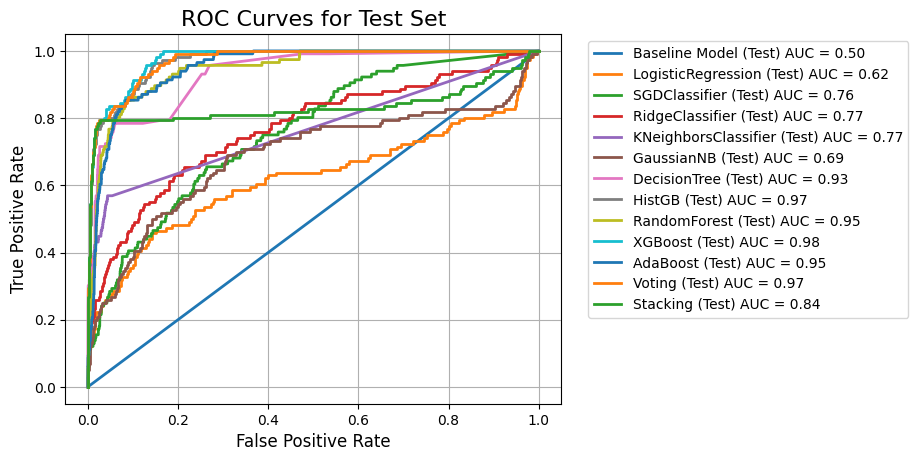

In [51]:
evaluator.plot_curves(curve_type='roc', dataset_name="Test")

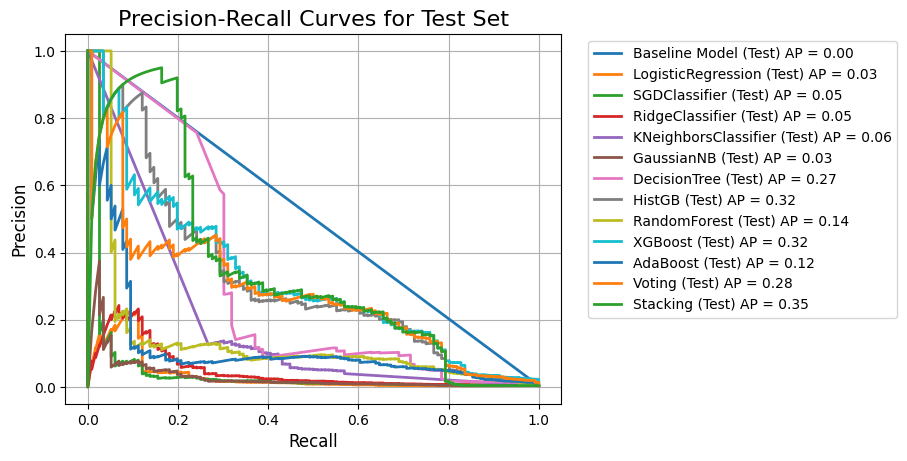

In [52]:
evaluator.plot_curves(curve_type='precision_recall', dataset_name="Test")